In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
wd = "E:\\Petter Bjornstad\\Pima\\Master data\\Raw data\\"
# wd = "path/to/Laura's/folder"

# Vital Status

In [5]:
# Import
vital_status = pd.read_csv(wd+'NelsonVitalStatusDEC_DATA_2021-02-04_1616.csv')
vital_status.head()

# Delete empty rows
vital_status = vital_status[vital_status['end_stage_renal_disease_form_complete']!=0]
# Collapse rows - get first non-NA element in each column by record ID
vital_status = vital_status.groupby('record_id',as_index=False).first()
# Get columns of interest - ask Rob and Helen for a list of these
vital_status = vital_status[['esrd_start_date','dod']]

print(vital_status)

    esrd_start_date         dod
0              None  1999-10-07
1        2013-07-15  2014-09-14
2              None  1999-09-18
3        2005-11-18  2010-07-15
4              None  2001-05-05
..              ...         ...
206            None  2005-06-18
207            None  2017-01-24
208      2018-11-07        None
209      2012-02-10  2014-01-26
210            None  2014-03-05

[211 rows x 2 columns]


# Height

In [28]:
def get_ht(df):
    # Convert record id to categorical 
    df['record_id'] = df['record_id'].astype("category")
    # Index by id and redcap event
    df = df.set_index(['record_id','redcap_event_name'])
    # Find height and date columns
    ht_cols = [col for col in df.columns if col in ['height']]  
    date_cols = [col for col in df.columns if 'visitdate' in col and "_" not in col]
    # Get all dates
    for d in range(len(date_cols)-1):
        df[date_cols[0]] = df[date_cols[0]].fillna(df[date_cols[d]])
    ht = df[[date_cols[0]]+ht_cols]
    # Get all 
    # Drop completely missing rows and columns
    df = ht.dropna(axis=0,subset=ht_cols,how='all').dropna(axis=1,how='all')
    # Reindex by name and date
    df.reset_index(level=1,drop=True,inplace=True)
    df.rename(columns={df.columns[0]:'date'},inplace=True)
    df.set_index('date',append=True,inplace=True)
    # Done
    return(df)
def ht_lineplot(df,ax):
    # Sort by id then date
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    return(sns.lineplot(x="visit_num", y="height",hue="record_id",ax=ax,data=df).get_legend().remove())
def ht_boxplot(df,ax):
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    return(sns.boxplot(x='record_id',y="height",ax=ax,data=df))

# Group 4

<AxesSubplot:xlabel='record_id', ylabel='height'>

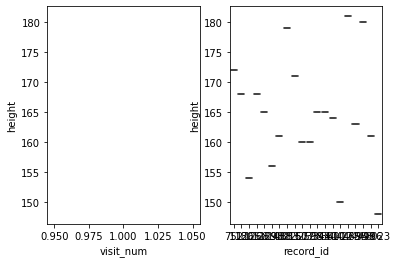

In [30]:
group4 = pd.read_csv(wd+'Group4UofMRemodel112_DATA_2021-02-04_1617.csv',low_memory=False).dropna(axis=1,how='all')
#print(group4)
#group4.loc[:,"height"]
h = get_ht(group4)
# Plot
fig, ax =plt.subplots(1,2)
ht_lineplot(h,ax=ax[0])
ht_boxplot(h,ax=ax[1])

# Ficoll

<AxesSubplot:xlabel='record_id', ylabel='height'>

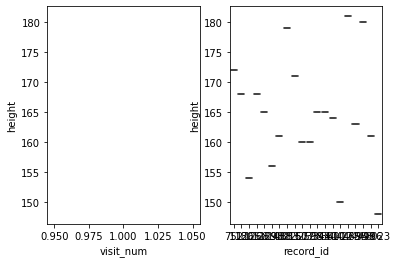

In [31]:
ficoll = pd.read_csv(wd+'FicollUniversityOfMi_DATA_2021-02-04_1618.csv',low_memory=False).dropna(axis=1,how='all')
h = get_ht(group4)
# Plot
fig, ax =plt.subplots(1,2)
ht_lineplot(h,ax=ax[0])
ht_boxplot(h,ax=ax[1])

# DDN

<AxesSubplot:xlabel='record_id', ylabel='height'>

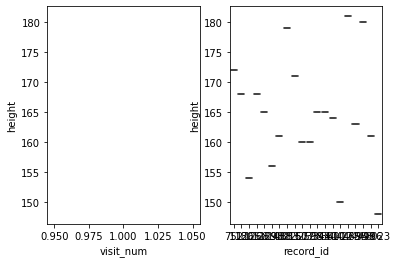

In [34]:
ddn = pd.read_csv(wd+'Nelson13DKN151Determ_DATA_2021-02-04_1610.csv',low_memory=False).dropna(axis=1,how='all')
h = get_ht(group4)
# Plot
fig, ax =plt.subplots(1,2)
ht_lineplot(h,ax=ax[0])
ht_boxplot(h,ax=ax[1])